# MINI PROJECT - NETFLIX

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
netflix = pd.read_csv("netflix_data.csv")
netflix

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


## Data Cleaning and check

### 1. Check Missing values

In [3]:
netflix.isnull().sum() 
netflix.isna().sum() 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

### 2. Check duplicates

In [4]:
duplicates = netflix[netflix.duplicated()]
duplicates

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre


In [5]:
dup_sum = netflix.duplicated().sum()
dup_sum

0

### 3. Check inconsistent data types

In [6]:
netflix.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


### 4. Check unexpected values

#### Outliers in numerical columns

,release_year,duration
std,8.757395,50.950743
mean,2013.932580,69.122769
min,1925.000000,1.000000
max,2021.000000,312.000000


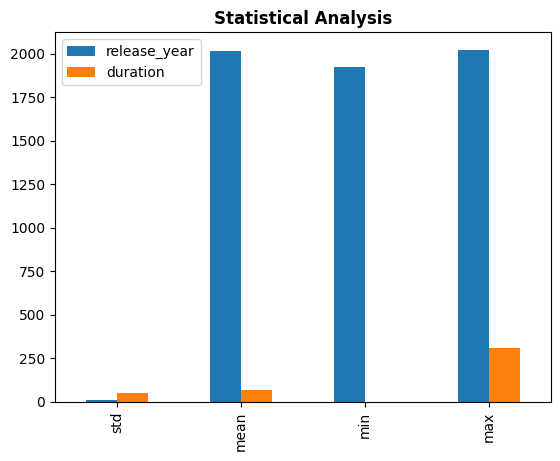

In [7]:
description = netflix.describe()
desc_std = description.loc[["std", "mean", "min", "max"]]

desc_std.plot(kind = "bar")
plt.title("Statistical Analysis", weight = "bold")

desc_std

### 5. Check white spaces and formatting Issues

In [8]:
netflix["release_year"] = netflix["release_year"].astype(str).str.strip()
netflix["release_year"] = netflix["release_year"].astype(int)
netflix["release_year"]

0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7787, dtype: int32

In [9]:
netflix["duration"] = netflix["duration"].astype(str).str.strip()
netflix["duration"] = netflix["duration"].astype(int)
netflix["duration"]

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7787, dtype: int32

### 6. Check for Incorrect Data Entries

In [10]:
rel_dur = netflix[["release_year", "duration"]]
dur_check_boolean = rel_dur["duration"] > 360
dur_check = rel_dur[rel_dur["duration"] > 360]
dur_check

,release_year,duration


In [11]:
years_check_boolean = rel_dur["release_year"].astype(str).str.len() > 4
years_check = rel_dur[rel_dur["release_year"].astype(str).str.len() > 4] # found that to check if the len of the values in the release_year column is greater than 4, I needed to change the format to string using(astype(str),
# and performing (.str.len()) because is the pandas function to calculate the length.
years_check

,release_year,duration


In [12]:
unex_check = dur_check_boolean.any() or years_check_boolean.any()
unex_check

False

### 7. Check for Column name Issues

In [13]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [14]:
# netflix.columns = netflix.columns.str.strip()
# netflix.columns = netflix.str.lower()
# netflix.columns = netflix.str.replace(' ', '_')

# Any of the above functions were necessary.

# Part 1: Understanding more about movies from the 1990s decade.

### Filtering the Netflix content type to show only the movies

In [15]:
netflix_movies = netflix[netflix["type"] == "Movie"]
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [16]:
netflix_movies

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


### Filtering the release years

In [17]:
netflix_movies_1990s = netflix_movies[(netflix_movies["release_year"] > 1989) & (netflix_movies["release_year"] < 2000)]
netflix_movies_1990s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
166,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
210,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
238,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
273,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7535,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
7570,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
7623,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
7681,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


### Filtering duration

In [22]:
netflix_movies_1990s_90m = netflix_movies_1990s[netflix_movies_1990s["duration"] < 90]
netflix_movies_1990s_90m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 210 to 7090
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       40 non-null     object
 1   type          40 non-null     object
 2   title         40 non-null     object
 3   director      38 non-null     object
 4   cast          38 non-null     object
 5   country       38 non-null     object
 6   date_added    40 non-null     object
 7   release_year  40 non-null     int32 
 8   duration      40 non-null     int32 
 9   description   40 non-null     object
 10  genre         40 non-null     object
dtypes: int32(2), object(9)
memory usage: 3.4+ KB


### Counting the number of movies based on their duration

The most frequent movie durantion in the 1990s is: 89 minutes in 4 different movies


Text(0.5, 0, 'Duration in minutes')

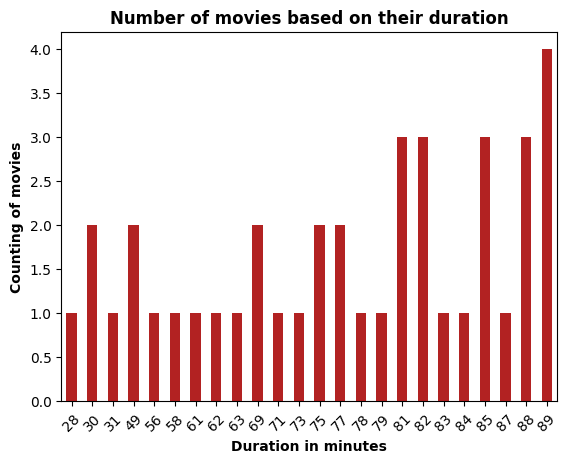

In [19]:
m_freq_dur = netflix_movies_1990s_90m.groupby("duration").size()
max_freq = m_freq_dur.max()
movie_minutes = m_freq_dur[m_freq_dur == max_freq].index[0]

print(f"The most frequent movie durantion in the 1990s is: {movie_minutes} minutes in {max_freq} different movies")
num_movies_dur = netflix_movies_1990s_90m.groupby("duration")["title"].count()
num_movies_dur.plot(kind = "bar", color = "firebrick", rot = 45)
plt.title("Number of movies based on their duration", weight = "bold")
plt.ylabel("Counting of movies", weight = "bold")
plt.xlabel("Duration in minutes", weight = "bold")

### Number of short action movies

In [20]:
act_movie_90s_90m = netflix_movies_1990s_90m[netflix_movies_1990s_90m["genre"] == "Action"]
short_movie_count = act_movie_90s_90m["genre"].value_counts()

print("The number of short actions movies is:\n ", short_movie_count)

The number of short actions movies is:
  genre
Action    8
Name: count, dtype: int64


In [21]:
filter_action = act_movie_90s_90m[["type", "release_year", "duration", "genre"]]
filter_action

,type,release_year,duration,genre
2038,Movie,1998,69,Action
2707,Movie,1997,89,Action
3717,Movie,1990,88,Action
4422,Movie,1993,82,Action
4786,Movie,1992,84,Action
5298,Movie,1995,89,Action
6113,Movie,1993,83,Action
6329,Movie,1997,87,Action


In [22]:
filter_action.shape

(8, 4)

# Part 2: Investigating the trend in the duration of movies available on Netflix
### What does this trend look like over a longer period of time?

### Selecting only the necessary data to reach the goal

In [23]:
nf_title_year = netflix_movies[["title","release_year", "duration"]]
nf_title_year

,title,release_year,duration
1,7:19,2016,93
2,23:59,2011,78
3,9,2009,80
4,21,2008,123
6,122,2019,95
...,...,...,...
7781,Zoom,2006,88
7782,Zozo,2005,99
7783,Zubaan,2015,111
7784,Zulu Man in Japan,2019,44


### Sorting the dataframe by the release_years column

In [24]:
sort_release = nf_title_year.sort_values(by = "release_year")
sort_release

,title,release_year,duration
4960,Prelude to War,1942,52
6117,The Battle of Midway,1942,18
7616,Why We Fight: The Battle of Russia,1943,82
7342,Undercover: How to Operate Behind Enemy Lines,1943,61
7679,WWII: Report from the Aleutians,1943,45
...,...,...,...
7644,Wish You,2021,102
1514,"Crack: Cocaine, Corruption & Conspiracy",2021,90
4710,Outside the Wire,2021,116
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021,76


### Creating the average movie duration for each year

In [25]:
avg_nf_dur_year = sort_release.groupby("release_year")["duration"].mean()
avg_nf_dur_year

release_year
1942    35.000000
1943    62.666667
1944    52.000000
1945    51.333333
1946    58.000000
          ...    
2017    94.836022
2018    96.170300
2019    93.457045
2020    89.795620
2021    80.166667
Name: duration, Length: 72, dtype: float64

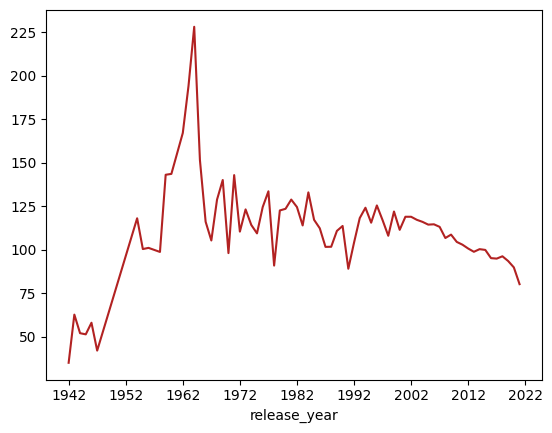

In [26]:
ax = avg_nf_dur_year.plot(kind = "line", x = "release_year", y = "duration", color = "firebrick")
ax.set_xticks(range(1942,2023,10))

## Is this explainable by something like the genre of entertainment?
####        One of the possible answers to this question is how many different kinds of entertainment have appeared in the last 30 years, but that is not the only reason for the movie duration to decrease.
###### More information in the presentation slides.

In [43]:
genre_exp = netflix_movies[["title", "release_year", "duration", "genre"]]
genre_exp

,title,release_year,duration,genre
1,7:19,2016,93,Dramas
2,23:59,2011,78,Horror Movies
3,9,2009,80,Action
4,21,2008,123,Dramas
6,122,2019,95,Horror Movies
...,...,...,...,...
7781,Zoom,2006,88,Children
7782,Zozo,2005,99,Dramas
7783,Zubaan,2015,111,Dramas
7784,Zulu Man in Japan,2019,44,Documentaries
